In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [5]:
path = 'data.csv'
data = pd.read_csv(path)

In [3]:
data

,user_id,recipe_id,review_date,review,minutes,recipe_date,tags,n_steps,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),healthy_index,rating
0,8937,44394,2002-12-01,This worked very well and is EASY. I used not...,20,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course...",5,"[""devil's food cake mix"", 'vegetable oil', 'eg...",4,132.3,11.0,39.0,5.0,4.0,11.0,5.0,1.0,4
1,126440,85009,2010-02-27,I made the Mexican topping and took it to bunk...,10,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...",3,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13,2786.2,342.0,134.0,290.0,161.0,301.0,42.0,0.0,5
2,57222,85009,2011-10-01,"Made the cheddar bacon topping, adding a sprin...",10,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...",3,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13,2786.2,342.0,134.0,290.0,161.0,301.0,42.0,0.0,5
3,52282,120345,2005-05-21,very very sweet. after i waited the 2 days i b...,10,2005-05-02,"['15-minutes-or-less', 'time-to-make', 'course...",6,"['raspberries', 'granulated sugar']",2,838.0,1.0,820.0,0.0,2.0,0.0,71.0,0.0,4
4,124416,120345,2011-08-06,"Just an observation, so I will not rate. I fo...",10,2005-05-02,"['15-minutes-or-less', 'time-to-make', 'course...",6,"['raspberries', 'granulated sugar']",2,838.0,1.0,820.0,0.0,2.0,0.0,71.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037801,116593,72730,2003-12-09,Another approach is to start making sauce with...,22,2003-10-06,"['30-minutes-or-less', 'time-to-make', 'course...",6,"['peaches', 'brown sugar', 'allspice', 'maple ...",6,1941.7,3.0,1569.0,3.0,10.0,1.0,154.0,0.0,0
1037802,583662,386618,2009-09-29,These were so delicious! My husband and I tru...,21,2009-08-24,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['carrot', 'garbanzo beans', 'salsa', 'corn fl...",8,124.7,1.0,11.0,24.0,10.0,0.0,8.0,1.0,5
1037803,157126,78003,2008-06-23,WOW! Sometimes I don't take the time to rate ...,115,2003-12-05,"['weeknight', 'time-to-make', 'course', 'prepa...",8,"['boneless beef chuck roast', 'olive oil', 'ta...",10,828.2,87.0,22.0,20.0,93.0,112.0,4.0,0.0,5
1037804,53932,78003,2009-01-11,Very good! I used regular port as well. The ...,115,2003-12-05,"['weeknight', 'time-to-make', 'course', 'prepa...",8,"['boneless beef chuck roast', 'olive oil', 'ta...",10,828.2,87.0,22.0,20.0,93.0,112.0,4.0,0.0,4


/var/folders/dk/y1b9519s455gxzhm12ll2sm80000gn/T/ipykernel_35377/567573378.py:7: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  data = data.drop((data[data["minutes"]>=upper].index | data[data["minutes"]<=lower].index),axis=0)


<AxesSubplot:>

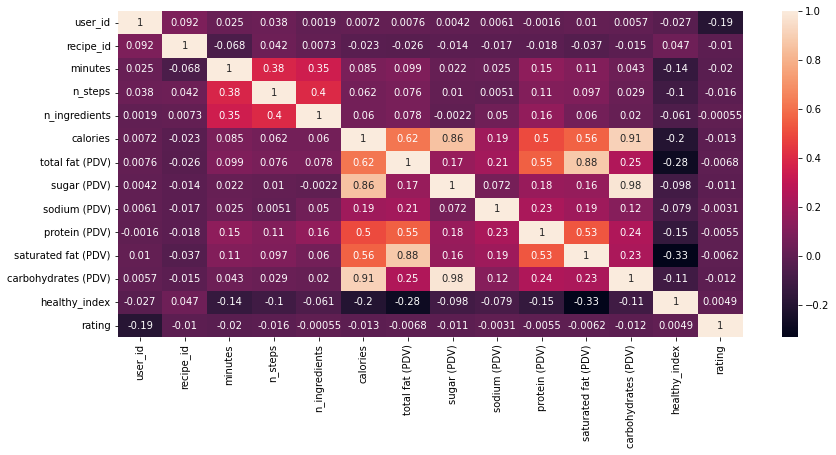

In [6]:
q1 = np.percentile(data["minutes"],25)
q3 = np.percentile(data["minutes"],75)
IQR = q3- q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR

data = data.drop((data[data["minutes"]>=upper].index | data[data["minutes"]<=lower].index),axis=0)
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='n_ingredients', ylabel='minutes'>

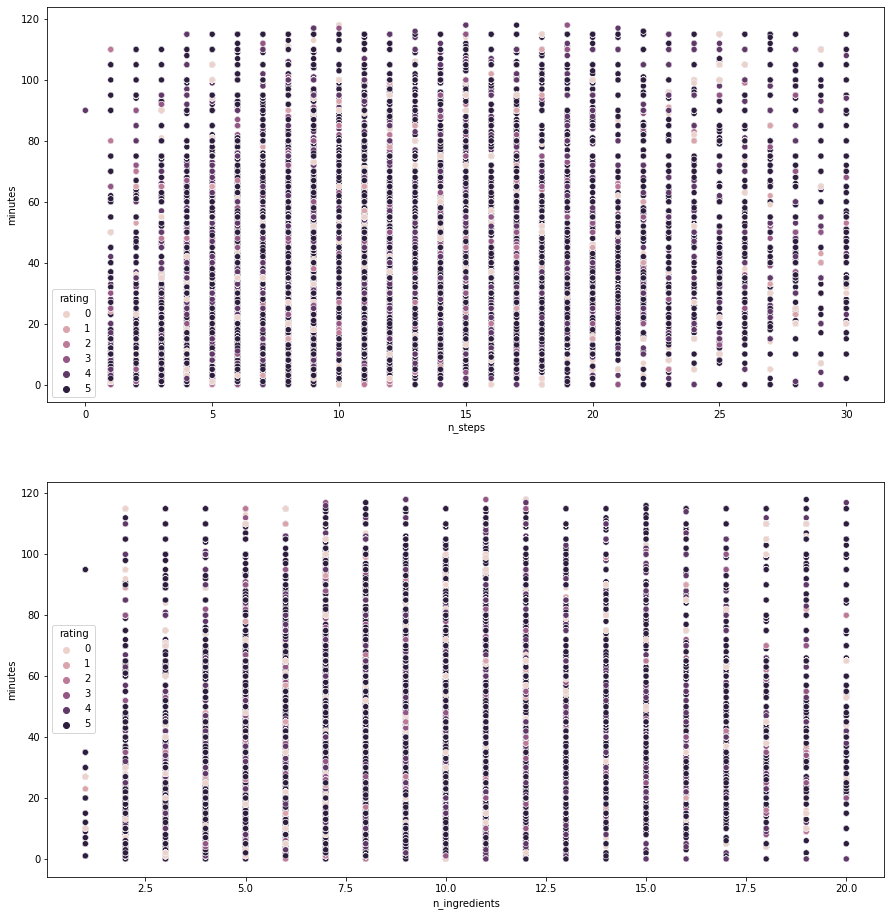

In [9]:
fig,ax = plt.subplots(2,1,figsize=(15,16))
sns.scatterplot(data=data,x="n_steps",y="minutes" ,hue="rating",ax=ax[0])
sns.scatterplot(data=data,x="n_ingredients",y="minutes" ,hue="rating",ax=ax[1])

<AxesSubplot:xlabel='n_steps', ylabel='rating'>

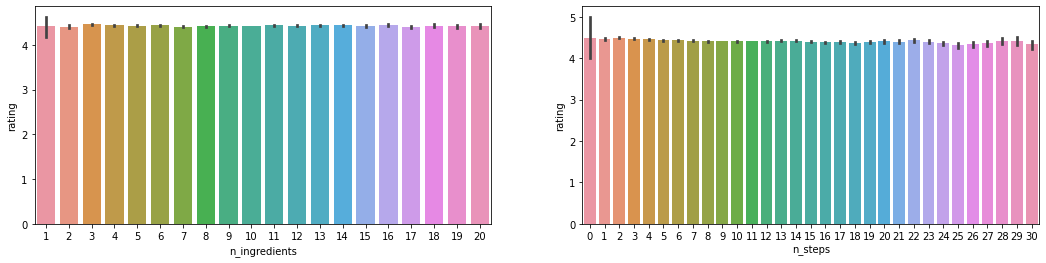

In [10]:
fig,ax = plt.subplots(1,2,figsize=(18,4))
sns.barplot(data=data,y="rating",x="n_ingredients",ax=ax[0])
sns.barplot(data=data,y="rating",x="n_steps",ax=ax[1])

In [13]:
density = []
for i in range(6):
    density.append(1- data[data['rating']==i]['healthy_index'].sum()/len(data[data['rating']==i]))
    density.append(data[data['rating']==i]['healthy_index'].sum()/len(data[data['rating']==i]))

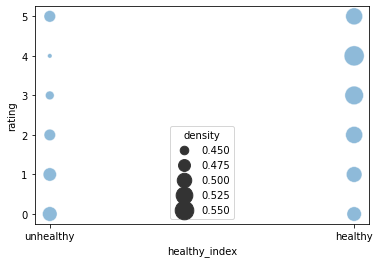

In [15]:
d = {'healthy_index' :['unhealthy','healthy','unhealthy','healthy', 'unhealthy','healthy','unhealthy','healthy','unhealthy','healthy','unhealthy','healthy'], 'rating': [0,0,1,1,2,2,3,3,4,4,5,5], 'density':density}
df = pd.DataFrame(data=d)
sns.scatterplot(data=df, x="healthy_index", y="rating", size="density", alpha=0.5, sizes=(20, 400))
plt.show()